**This is the code for the machine learning model**

In order to use this code, your data must be saved as **"TotalTrafo.csv"** in the same folder as this code

In [1]:
#import neccessary tools and the csv file "TotalTrafo.csv"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
data = pd.read_csv("TotalTrafo.csv")

In [2]:
#Look at the data and shape it, so the right format is used and it can be seperated
dir(data)
type(data.Trafo1)

pandas.core.series.Series

In [3]:
# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
Y = data['Trafo1']

#cyclic decoding of the hours (0-23) to sin and cosine values
data['hour_sin'] = np.sin(2 * np.pi * data['Hour']/23.0)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour']/23.0)

X = data.drop(['Trafo1','datetime', 'Trafo_Total', 'Month', 'Day', 'Hour'],axis=1)

#check the format and the shape of the data again
print(X)
#print(Y)

      Trafo2  Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  \
0      17.86        1     -4.70       2.2       -5.23      1012        97   
1      19.58        1     -5.20       2.7       -4.92      1012        94   
2      18.18        1     -5.70       2.0       -5.48      1012        92   
3      16.83        1     -5.00       1.7       -5.10      1012        93   
4      17.54        1     -4.64       0.0       -5.64      1012        93   
...      ...      ...       ...       ...         ...       ...       ...   
8755   26.88        1     -2.30       8.4       -1.54      1016        41   
8756   20.86        1     -3.00       7.8       -3.70      1017        48   
8757   12.54        1     -2.20       7.1       -0.42      1018        60   
8758   20.61        1     -2.30       6.9       -1.94      1019        53   
8759   17.41        1     -2.50       6.9       -2.17      1020        53   

      Wind Speed      hour_sin  hour_cos  
0           1.18  0.000000e+00  

In [4]:
data.Trafo1.shape

(8760,)

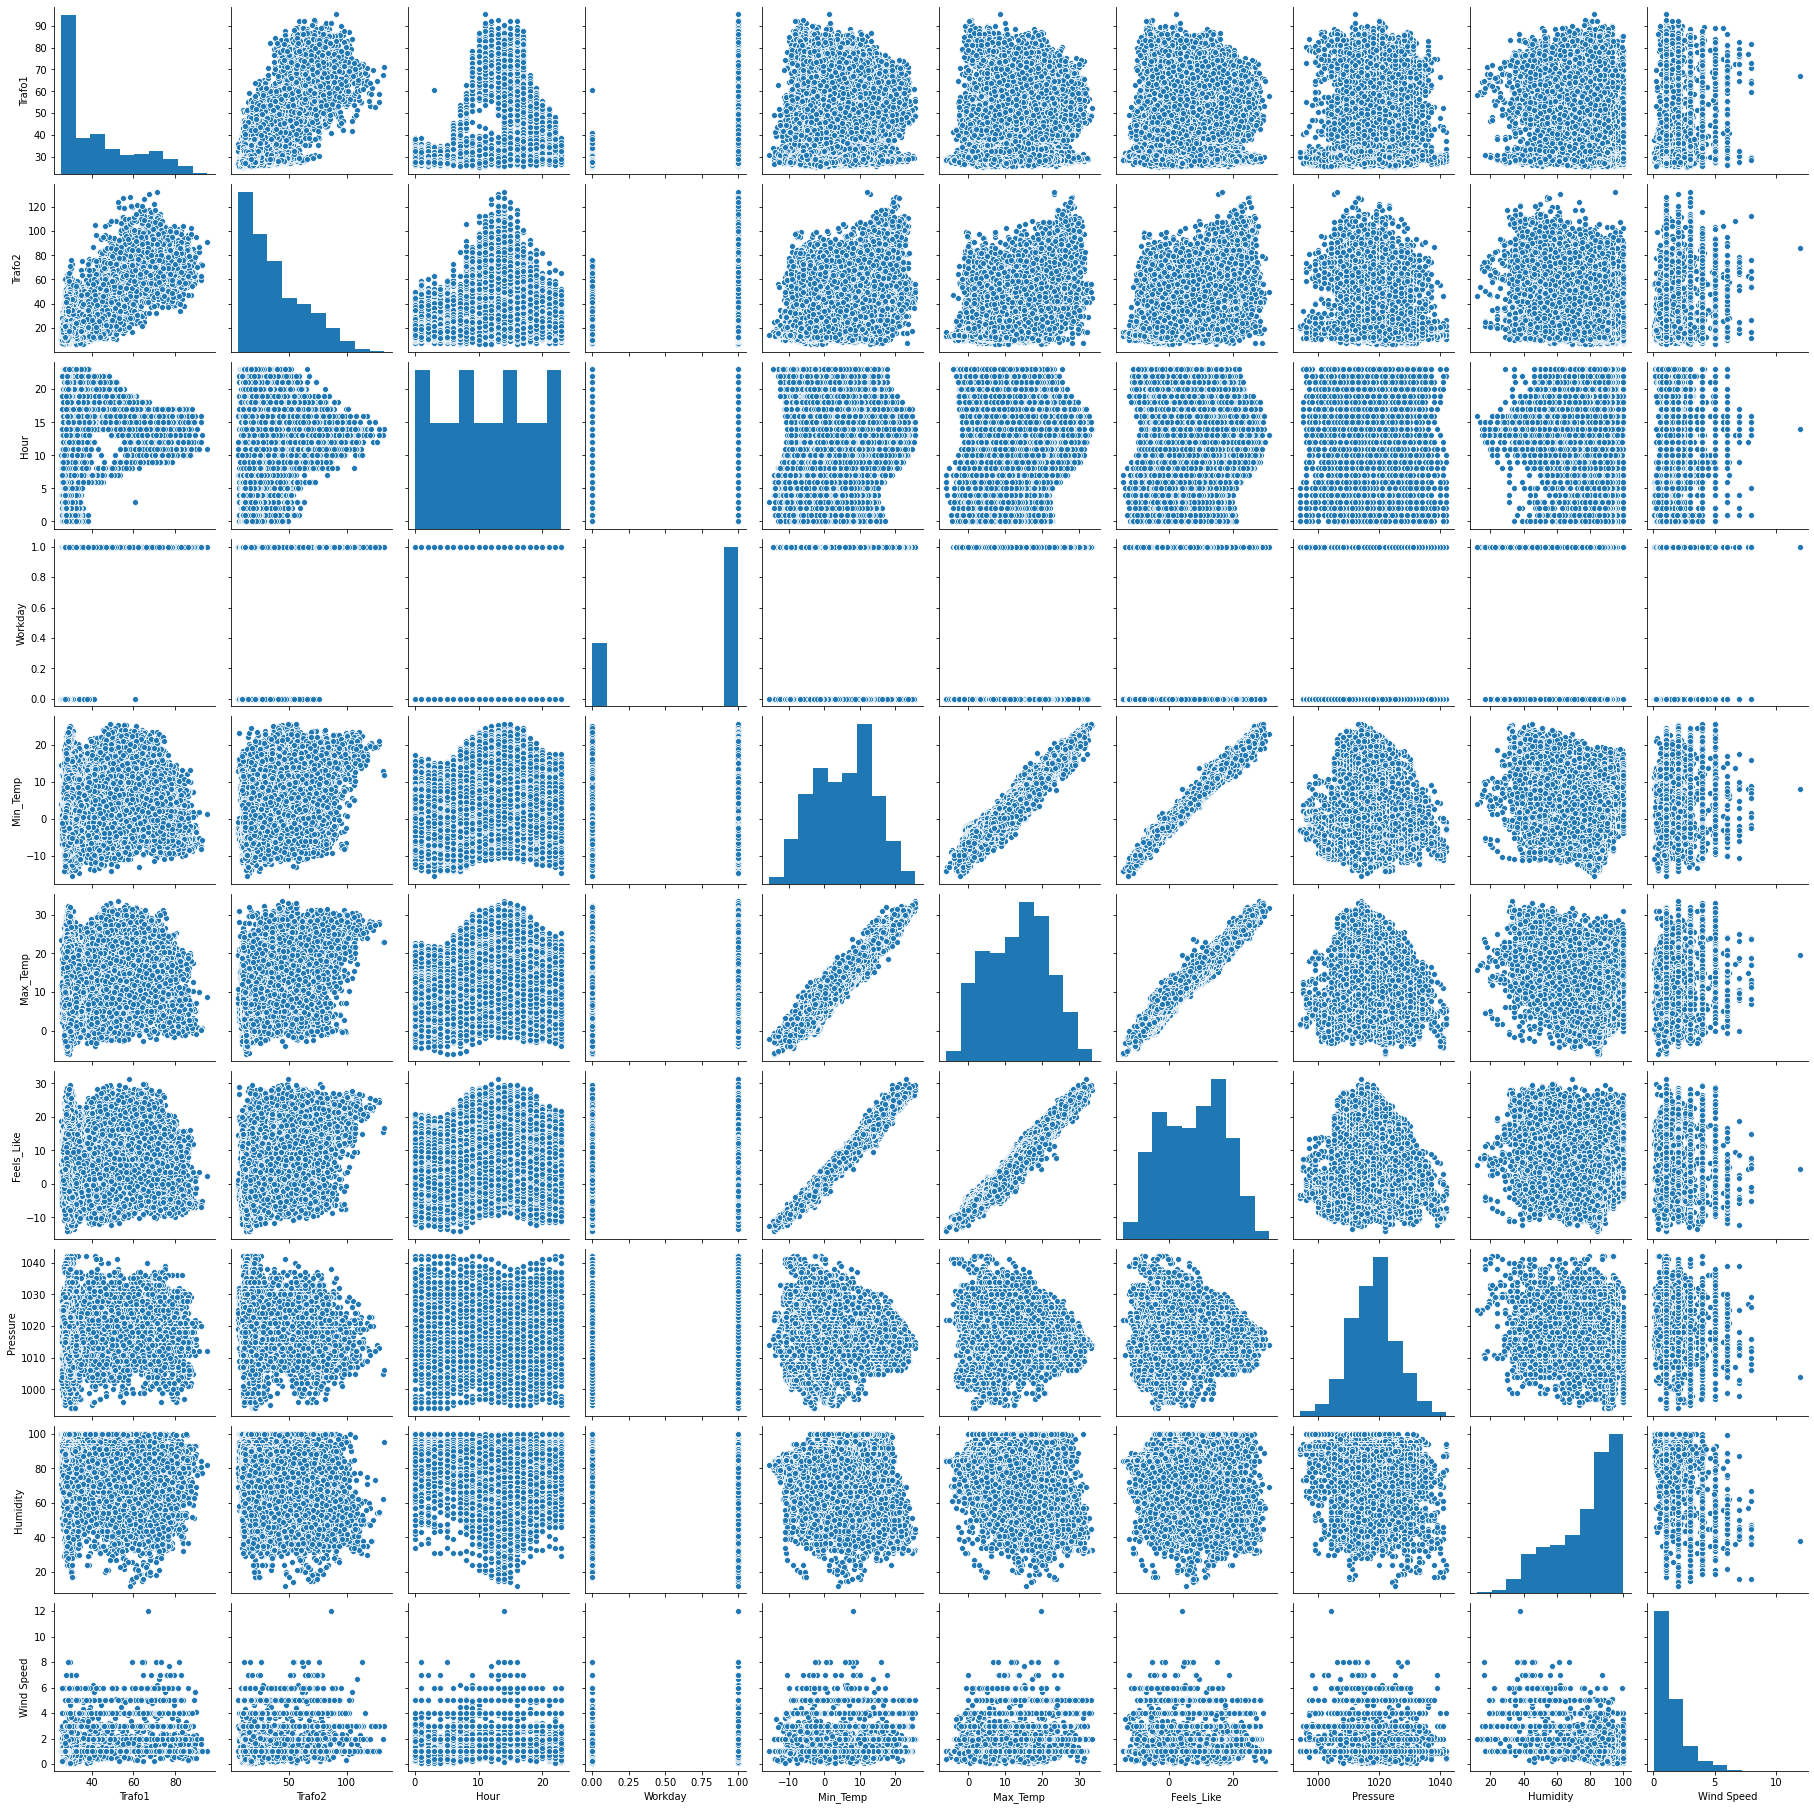

In [5]:
Visuals = sns.pairplot(data, vars = ["Trafo1","Trafo2","Hour","Workday","Min_Temp","Max_Temp","Feels_Like","Pressure","Humidity","Wind Speed"])

In [6]:
data['Trafo1']

0       29.31
1       29.06
2       30.40
3       30.02
4       30.91
        ...  
8755    49.54
8756    42.37
8757    40.58
8758    38.14
8759    29.18
Name: Trafo1, Length: 8760, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [27]:
from sklearn.svm import SVR

In [34]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

SVR()

In [35]:
predictions = regressor.predict(X_test)
len(predictions)

1752

In [36]:
print(X_test)

      Trafo2  Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  \
6561    9.73        1     -3.33      9.20        1.48      1015        91   
6565   15.49        1     -3.89     10.56       -0.55      1019        67   
4840   29.18        0      9.40     18.20       12.38      1026        65   
332    35.58        0      7.93     15.70       10.90      1013        83   
884    33.73        1      9.60     16.00        9.96      1012        57   
...      ...      ...       ...       ...         ...       ...       ...   
3395   81.34        1     14.56     20.00       19.29      1014        98   
7133   19.97        1     -7.10      3.20       -5.51      1012        88   
3757  102.66        1     20.20     27.70       23.78      1015        47   
257    45.31        1      4.00     13.00        6.28      1014        86   
721    13.70        1      6.20     13.50        9.19      1016       100   

      Wind Speed  hour_sin  hour_cos  
6561        1.00  0.631088 -0.775711

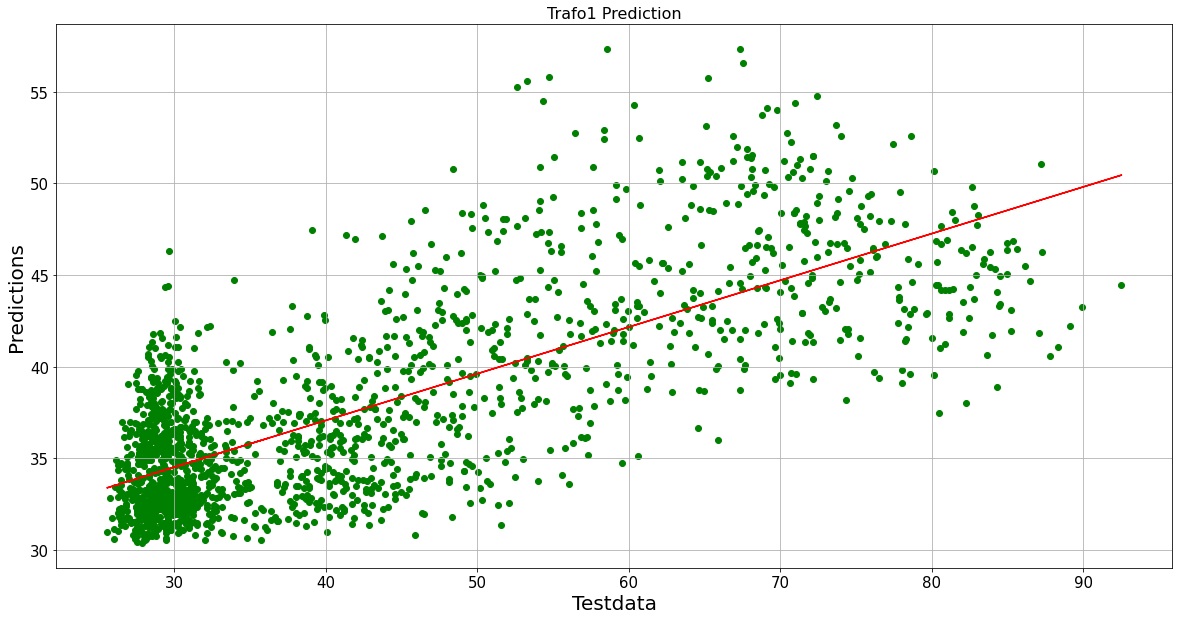

In [37]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.scatter(Y_test, predictions, color='green')
plt.title('Trafo1 Prediction', fontname='sans-serif', fontsize=16)
plt.xlabel("Testdata", fontsize=20)
plt.ylabel("Predictions", fontsize=20)
plt.grid(True)

#add a linear polynomial fit line to the plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(Y_test, predictions, 1)
plt.plot(Y_test, b + m * Y_test, '-r')

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE1 = r2_score(Y_test, predictions)
RMSE1 = np.sqrt(mean_squared_error(Y_test, predictions))
RMSE1 = round(RMSE1, 2)
MAE1 = round(MAE1, 4)

In [39]:
txt1 = "The R2 score is {MAE1}".format(MAE1 = MAE1)
txt2 = "With this model we can predict the energy consumption of Trafo 1 on a specific day within the range of \033[1m {RMSE1} kW".format(RMSE1 = RMSE1)

print(txt1)
print(txt2)



The R2 score is 0.3072
With this model we can predict the energy consumption of Trafo 1 on a specific day within the range of  13.77 kW
